# GPU short course program (7 h)

## Anaconda, JupyterLab and working with notebooks (20 min)

**Anaconda** (https://www.anaconda.com/) is an "ecosystem" for Python and R, including a distribution platform (or package manager) for Python and R programming languages.

It allows us to quickly install the necessary software, including Python, and get started with programming for GPUs.

Furtermore, it provides virtual environments, in case you need more than one set of packages. Inside each environment, packages will be compatible.

NOTE 1: What is "conda"? It is i) the `conda` program that installs packages and manages environments, and ii) the conda ecosystem and community.

NOTE 2: Is conda free? The conda-forge channel (add -c conda-forge to the install command) is free! The default channel may or may not be free:

"conda, the software program for package and environment management, is free to use by anyone.  It’s open source, too.
The conda-compatible packages in conda-forge, Bioconda, and almost all other publicly accessible channels are free to use by any one.
The conda-compatible packages in the default channel and Anaconda Distribution are free to use if:
Your organization has less than 200 people, or
Your organization has 200 or more people, but qualifies as an exempt organization in Anaconda’s terms of service:
Students and educational entities may use our free offerings in curriculum-based courses." 

*-See https://www.anaconda.com/blog/is-conda-free*

**JupyterLab** (https://jupyter.org/) is a web-based interactive development environment for notebooks, code, and data. Think of it as an integrated development environment (IDE) running in your browser.

**Matplotlib** (https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python. We will use the pyplot submodule. Lots of examples can be found at https://matplotlib.org/stable/gallery/index

### Task 1

1. Download and install Anaconda
2. Install the JupyterLab environment
3. Launch JupyterLab
4. Make a new notebook and add one cell with markdown (or $\LaTeX$ ) and one cell with Python-code
5. Import matplotlib.pyplot and plot the functions $f(x)=x^2$ and $g(x)=2x$

### Solution 1

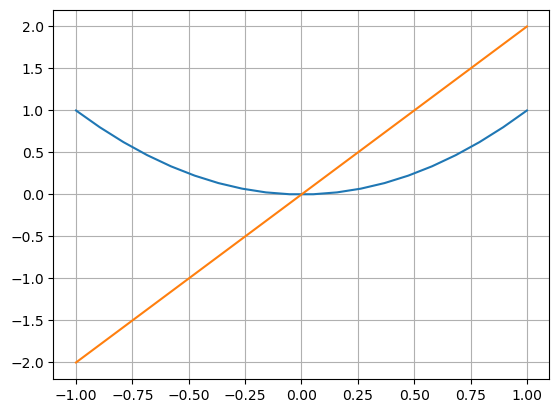

In [5]:
# Task 1.5

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1, 1, 20)

def f(x):
    return x*x

plt.plot(x, f(x))

def g(x):
    return 2*x

plt.plot(x, g(x))
plt.grid("on")

## Git, GitHub, and Google Colab (20 min)

**Git** (https://git-scm.com/) is a distributed version control system (also know as a source control management (SCM) tool). It allows multiple copies of your source code *repository*. Git had a lot of functionality (for branching, merging, rebasing, etc.), see `git --help`. We will clone the repository containing this file, and make commits of our changes.

"**GitHub** (/ˈɡɪthʌb/) is a proprietary developer platform that allows developers to create, store, manage, and share their code. It uses Git to provide distributed version control and GitHub itself provides access control, bug tracking, software feature requests, task management, continuous integration, and wikis for every project. Headquartered in California, it has been a subsidiary of Microsoft since 2018."

*-Wikipedia contributors, "GitHub," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=GitHub&oldid=1269115767 (accessed January 16, 2025).*

It is basically cloud-based hosting for Git repositories.

**Google Colab** is a hosted Jupyter Notebook service that requires no setup to use and provides free access to computing resources, including GPUs and TPUs.

### Task 2

1. Install Git on your computer 
2. Make an account on GitHub if you do not already have one
3. Login to GitHub, navigate to https://github.com/setmar/gpu-short-course and fork this repository
4. Use Git to clone your newly forked repository to your own computer
5. Add the Python code from Task 1.5, make a commit and push to your GitHub-repo
6. Login with you Google account (or make one if you do not already have one and go to https://colab.google.com/
7. Go to settings (the cogwheel in the top-right corner) -> GitHub and authorize GitHub (also check the "Access to private repos" if your repo is private)
8. View the video below to connect your GitHub repo to Colab (https://youtu.be/eLhy3_d2UPo)

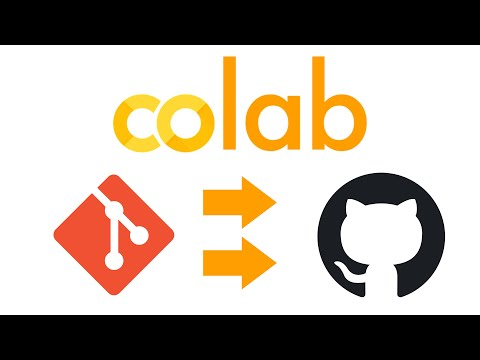

In [11]:
from IPython.display import YouTubeVideo
YouTubeVideo('eLhy3_d2UPo', width=1200, height=800)

### Solution 2

Task 1.4

`git clone <URL to your repository>` (will clone the repo to your current directory)

Task 1.5

```sh
git add program.ipynb
git commit -m "Added solution for task 1"
git push origin main
```

## GPU Hello World with PyCUDA (20 min)

<-- See hello_world_pycuda.ipynb